In [226]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from performance_measures import performance_measures
import timeit

In [227]:
from sklearn.linear_model import LogisticRegression # Logistic Regression
from sklearn.svm import SVC # Support Vector Machines
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighnors
from sklearn.naive_bayes import GaussianNB # Naive Bayes 
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.ensemble import RandomForestClassifier # Random Forest  
from sklearn.ensemble import AdaBoostClassifier # Ada Boost
from sklearn.ensemble import GradientBoostingClassifier # Gradient Boost
from xgboost import XGBClassifier # 

In [228]:
FetalHealth = pd.read_csv(r"source\fetal_health.csv")

In [229]:
FetalHealth.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [230]:
FetalHealth.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


In [231]:
FetalHealth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

Classes : 
1. Normal
2. Suspect
3. Pathological

Analysis consists of :

1. Count plot
2. Correlation heat map

C:\Users\Santhosh\AppData\Local\Temp\ipykernel_17792\1380002937.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = FetalHealth, x = "fetal_health", palette = colours)


<Axes: xlabel='fetal_health', ylabel='count'>

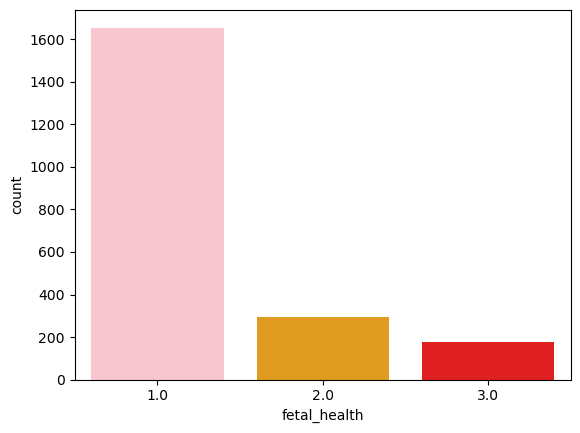

In [232]:
colours = ["pink","orange", "red"]
sns.countplot(data = FetalHealth, x = "fetal_health", palette = colours)

<Axes: >

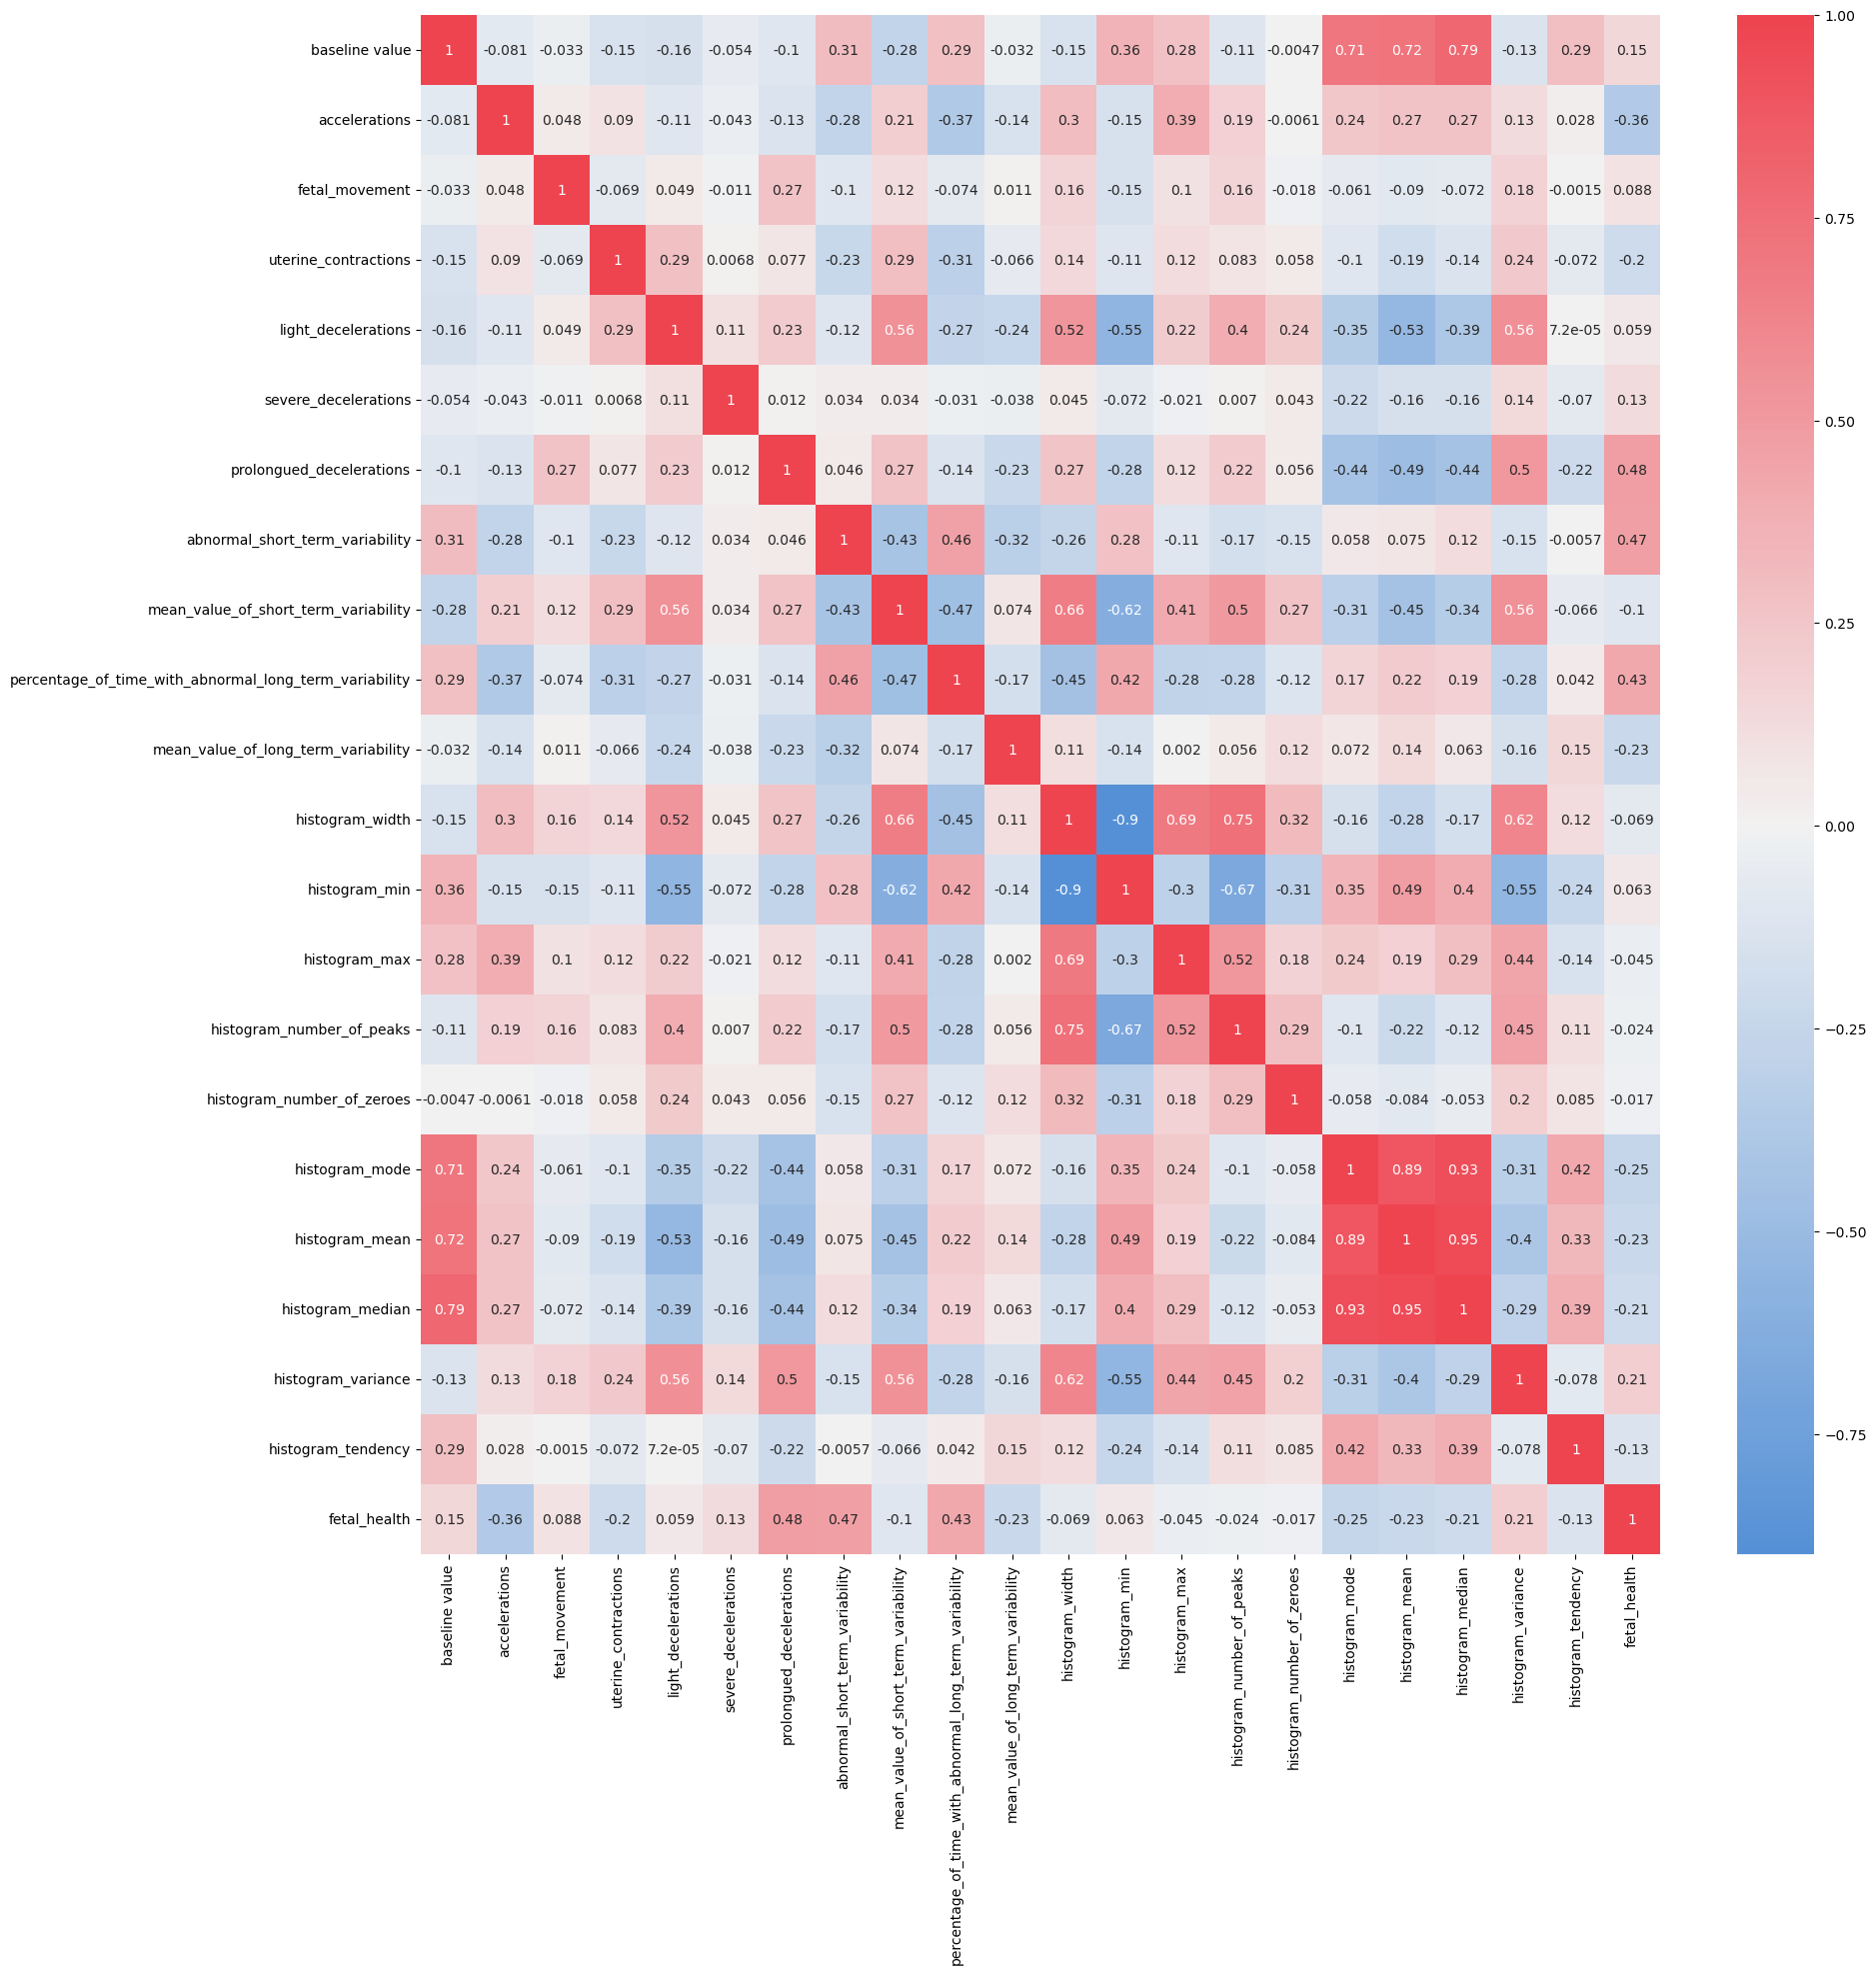

In [233]:
corrmat= FetalHealth.corr()
plt.figure(figsize=(20,20))  

cmap = sns.diverging_palette(250, 10, s=80, l=55, n=9, as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [1]:
cols = FetalHealth.columns
for i in cols:
    sns.boxenplot(x=FetalHealth["fetal_health"], y=FetalHealth[i], palette=colours)
    plt.show()

NameError: name 'FetalHealth' is not defined

C:\Users\Santhosh\AppData\Local\Temp\ipykernel_17792\489257876.py:3: UserWarning: 
The palette list has fewer values (5) than needed (22) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = FetalHealth,palette = shades)


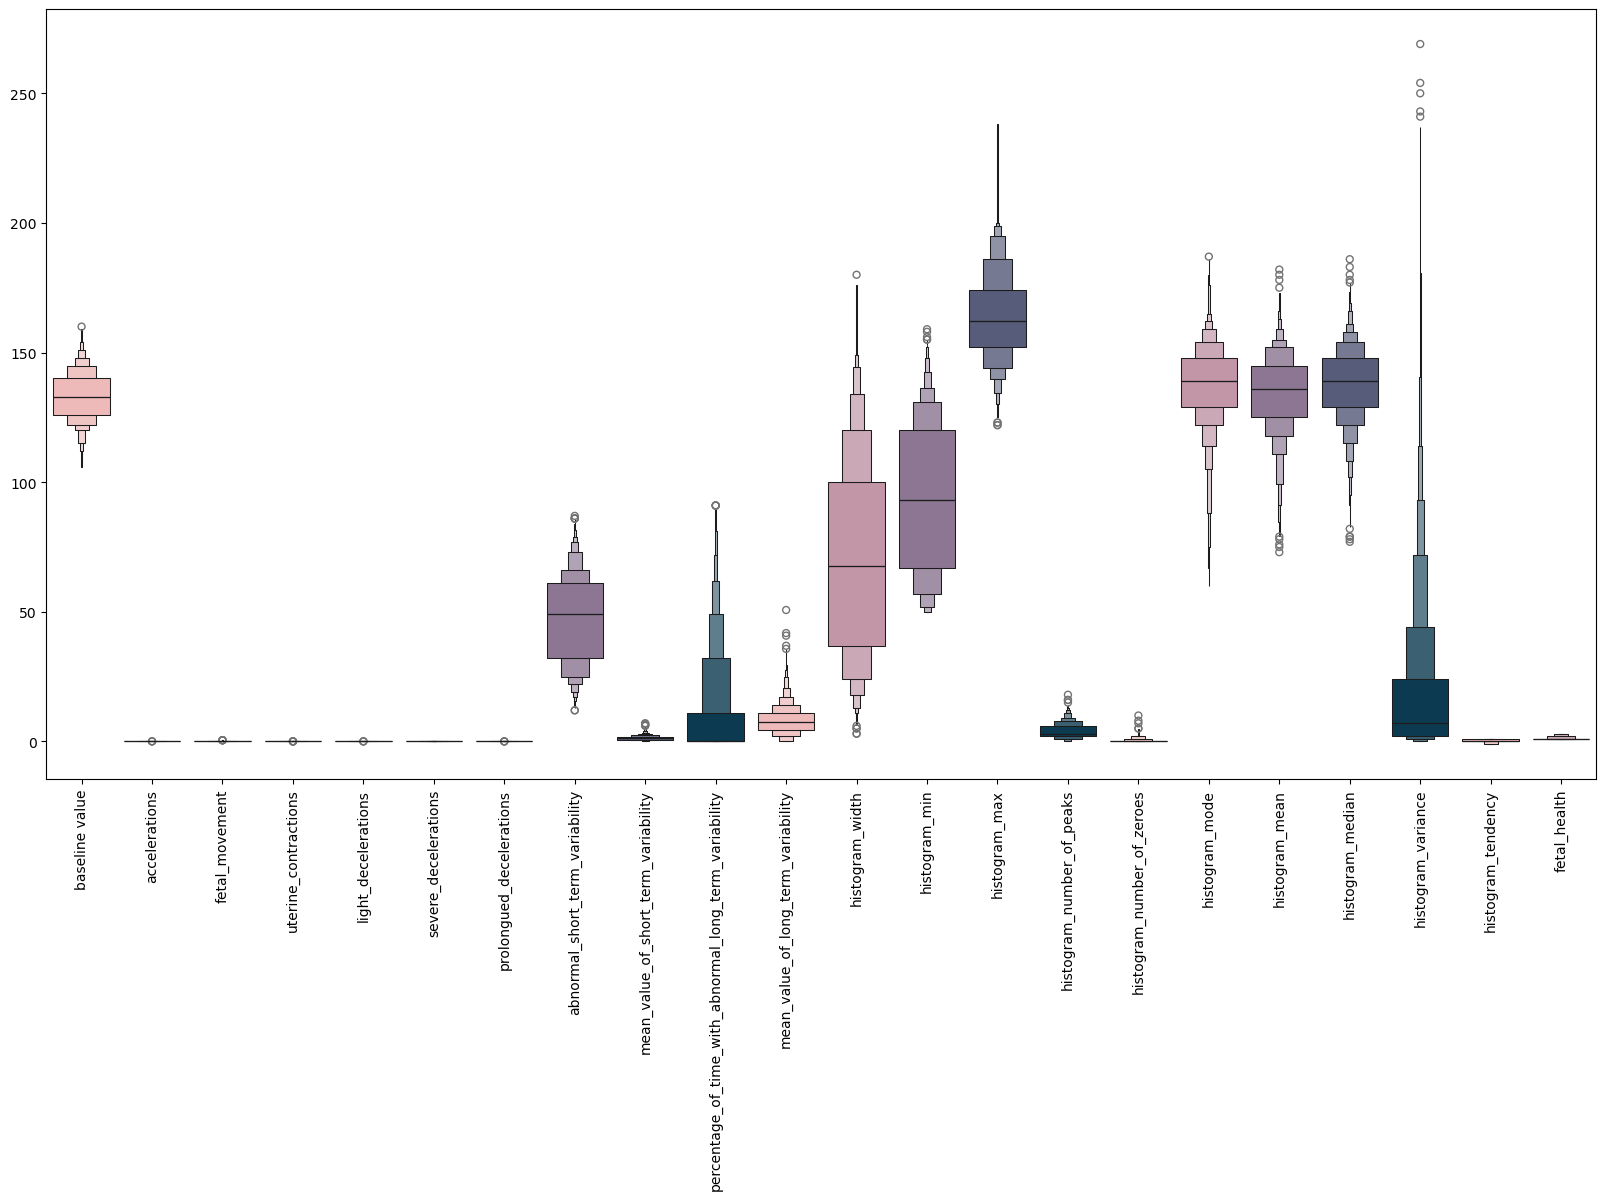

In [235]:
shades =["#f7b2b0","#c98ea6","#8f7198","#50587f", "#003f5c"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = FetalHealth,palette = shades)
plt.xticks(rotation=90)
plt.show()

Data Preprocessing :

1. Scaling
2. X,y and test, train division

In [236]:
X = FetalHealth.drop(['fetal_health'], axis = 1)
y = FetalHealth['fetal_health']

In [237]:
col_names = list(X.columns)
# Three different scaling methods

#s_scaler = preprocessing.StandardScaler()
s_scaler = preprocessing.MinMaxScaler()
#s_scaler = preprocessing.RobustScaler()
#s_scaler = preprocessing.MaxAbsScaler()
#s_scaler = preprocessing.Normalizer()
#s_scaler = preprocessing.QuantileTransformer()

scaler_name = "MinMax Scaling"
noscale = False
if(noscale):
    X_df = X
else:
    X_df= s_scaler.fit_transform(X)

X_df = pd.DataFrame(X_df, columns=col_names)   
X_df.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,0.505627,0.182238,0.0,0.370370,0.500000,0.629630,1.0
accelerations,2126.0,0.167277,0.203452,0.0,0.000000,0.105263,0.315789,1.0
fetal_movement,2126.0,0.019710,0.097018,0.0,0.000000,0.000000,0.006237,1.0
uterine_contractions,2126.0,0.291094,0.196405,0.0,0.133333,0.266667,0.466667,1.0
light_decelerations,2126.0,0.125964,0.197347,0.0,0.000000,0.000000,0.200000,1.0
severe_decelerations,2126.0,0.003293,0.057300,0.0,0.000000,0.000000,0.000000,1.0
prolongued_decelerations,2126.0,0.031703,0.117990,0.0,0.000000,0.000000,0.000000,1.0
abnormal_short_term_variability,2126.0,0.466535,0.229238,0.0,0.266667,0.493333,0.653333,1.0
mean_value_of_short_term_variability,2126.0,0.166586,0.129888,0.0,0.073529,0.147059,0.220588,1.0
percentage_of_time_with_abnormal_long_term_variability,2126.0,0.108205,0.202164,0.0,0.000000,0.000000,0.120879,1.0


C:\Users\Santhosh\AppData\Local\Temp\ipykernel_17792\3870634562.py:3: UserWarning: 
The palette list has fewer values (5) than needed (21) and will cycle, which may produce an uninterpretable plot.
  sns.boxenplot(data = X_df,palette = shades)


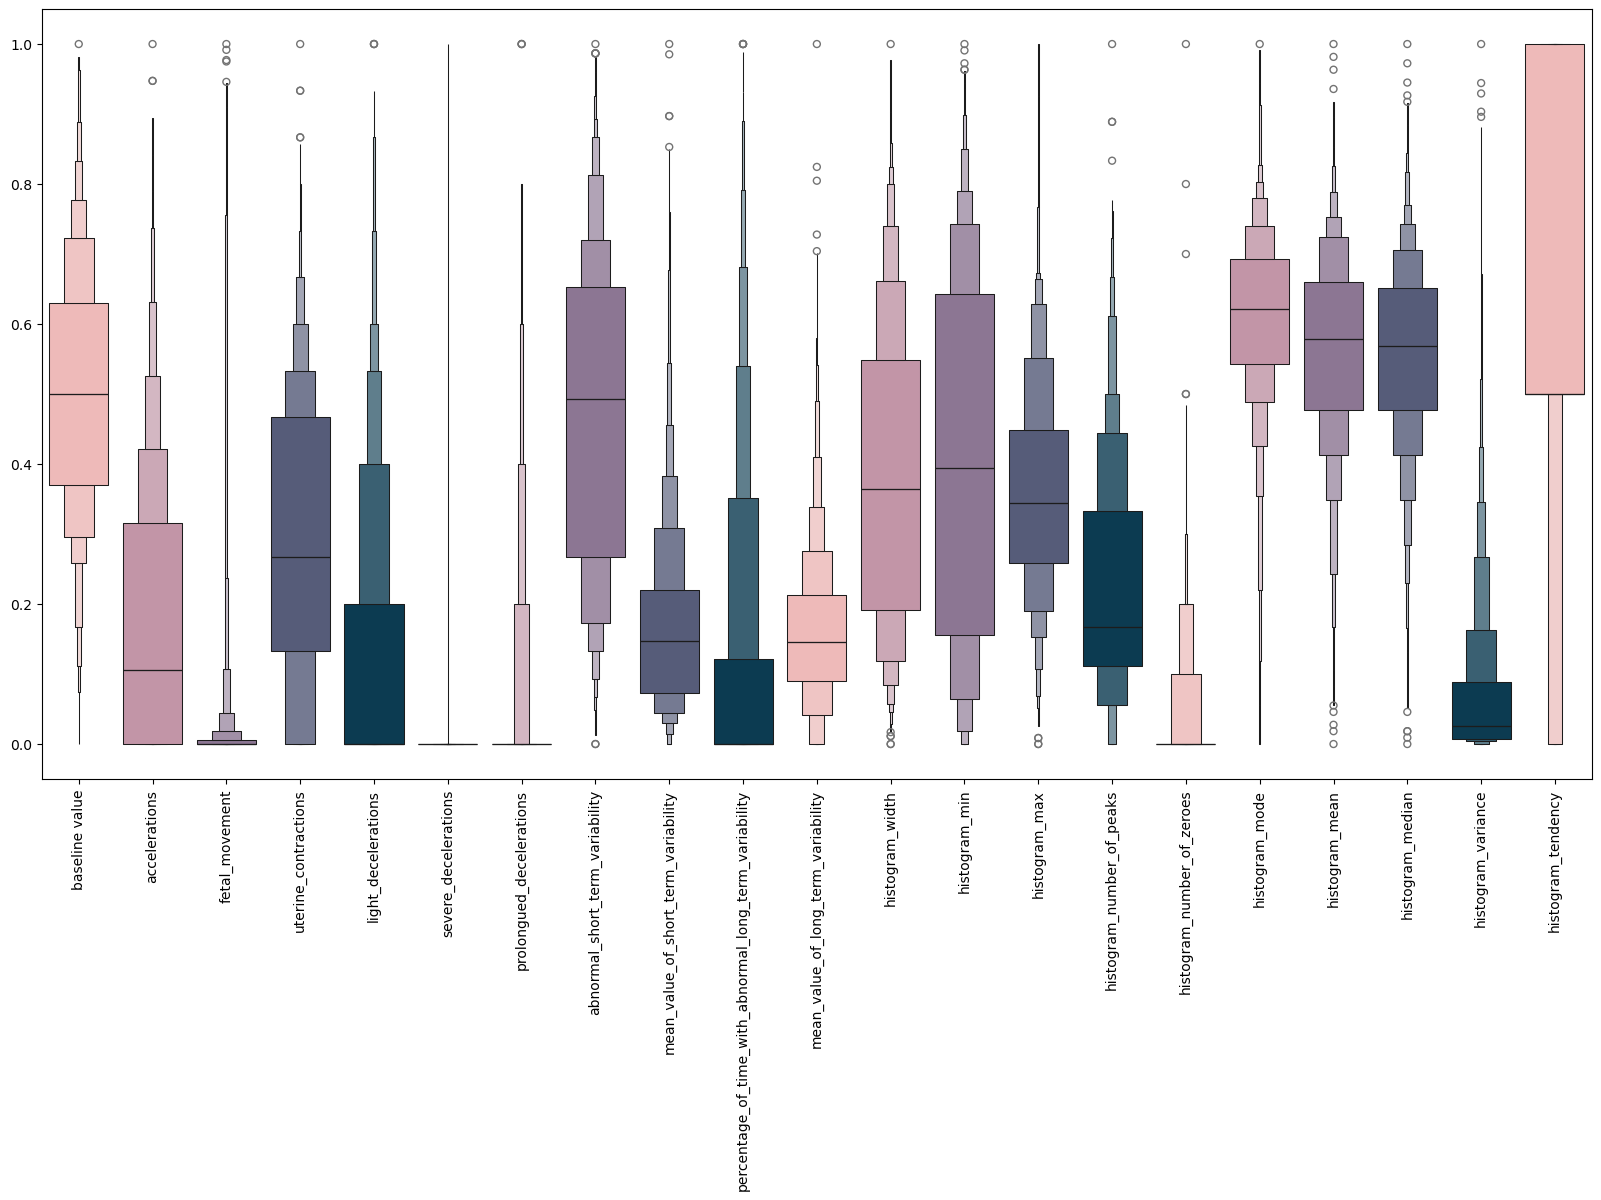

In [238]:
#looking at the scaled features
plt.figure(figsize=(20,10))
sns.boxenplot(data = X_df,palette = shades)
plt.xticks(rotation=90)
plt.show()

In [239]:
X_train, X_test, y_train,y_test = train_test_split(X_df,y,test_size=0.3,random_state=42)

In [240]:
performanceMeasuresDF = pd.DataFrame(columns=['Classifier Model', 'Accuracy','F1-Score','Recall','Precision','Jaccard-Score','Kappa-Score'])

In [241]:
lr = LogisticRegression(max_iter = 100000)
result = %timeit -o -n 100 -r 10 lr.fit(X=X_train, y=y_train) 
lr.fit(X = X_train, y = y_train)
print("Logistic Regression : ")
measures = performance_measures("Logistic Regression", lr, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
#performanceMeasuresDF = pd.concat((performanceMeasuresDF, pd.DataFrame(measures)))
exec_time = result.average

KeyboardInterrupt: 

In [ ]:
svmlinear = SVC(kernel = 'linear')
result = %timeit -o -n 100 -r 10 svmlinear.fit(X=X_train, y = y_train)
svmlinear.fit(X=X_train, y = y_train)
print("SVM Linear : ")
measures = performance_measures("Support Vector Machine(Linear)", svmlinear, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

85.2 ms ± 5.99 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)
SVM Linear : 
Accuracy : 0.9028213166144201
F1 : 0.9023821430205732
Recall : 0.9028213166144201
Precision : 0.9021273717208382
Jaccard : 0.8319247549284857
Kappa : 0.7316163000556362


In [ ]:
svmrbf = SVC(kernel = 'rbf')
result = %timeit -o -n 100 -r 10 svmrbf.fit(X=X_train, y = y_train)
svmrbf.fit(X=X_train, y = y_train)
print("SVM RBF : ")
measures = performance_measures("Support Vector Machine(RBF)", svmrbf, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

106 ms ± 8 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)
SVM RBF : 
Accuracy : 0.9169278996865203
F1 : 0.9152816367271186
Recall : 0.9169278996865203
Precision : 0.9150418575675975
Jaccard : 0.8520914937367478
Kappa : 0.7645117033797383


Two variants which haven't been tried before

In [ ]:
svmpoly = SVC(kernel = 'poly')
result = %timeit -o -n 100 -r 10 svmpoly.fit(X=X_train, y = y_train)
svmpoly.fit(X=X_train, y = y_train)
print("SVM Poly : ")
measures = performance_measures("Support Vector Machine(Poly)",svmpoly, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

139 ms ± 16.3 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)
SVM Poly : 
Accuracy : 0.9200626959247649
F1 : 0.9200626959247649
Recall : 0.9200626959247649
Precision : 0.9200626959247649
Jaccard : 0.8602007120118587
Kappa : 0.7818379306183203


In [ ]:
svmsigmoid = SVC(kernel = 'sigmoid')
result = %timeit -o -n 100 -r 10 svmsigmoid.fit(X=X_train, y = y_train)
svmsigmoid.fit(X=X_train, y = y_train)
print("SVM Sigmoid : ")
measures = performance_measures("Support Vector Machine(Sigmoid)",svmsigmoid, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

186 ms ± 16.6 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)
SVM Sigmoid : 
Accuracy : 0.7225705329153606
F1 : 0.6917461140280796
Recall : 0.7225705329153606
Precision : 0.689449294251756
Jaccard : 0.5874066367168104
Kappa : 0.07278862970170208


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
result = %timeit -o -n 100 -r 10 knn.fit(X=X_train, y = y_train) 
knn.fit(X=X_train, y = y_train)
print("K-Nearest Neighbors : ")
measures = performance_measures("K-Nearest Neighbors",knn, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

6 ms ± 1.24 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)
K-Nearest Neighbors : 
Accuracy : 0.8981191222570533
F1 : 0.8945373319562462
Recall : 0.8981191222570533
Precision : 0.8933041722354751
Jaccard : 0.8228317083918986
Kappa : 0.7079083788809377


In [ ]:
gnb = GaussianNB()
result = %timeit -o -n 100 -r 10 gnb.fit(X_train, y_train)
gnb.fit(X_train, y_train)
print("Naive Bayes : ")
measures = performance_measures("Naive Bayes",gnb, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

7.31 ms ± 1.01 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)
Naive Bayes : 
Accuracy : 0.7241379310344828
F1 : 0.7546859563343234
Recall : 0.7241379310344828
Precision : 0.8636453696393656
Jaccard : 0.6172461211284791
Kappa : 0.46404723379679347


In [ ]:
dt = DecisionTreeClassifier()
result = %timeit -o -n 100 -r 10 dt.fit(X_train, y_train)
dt.fit(X_train, y_train)
print("Decision Trees : ")
measures = performance_measures("Decision Tree",dt, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

35 ms ± 3.26 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)
Decision Trees : 
Accuracy : 0.9310344827586207
F1 : 0.9305827071557068
Recall : 0.9310344827586207
Precision : 0.93054885609372
Jaccard : 0.8750866737297127
Kappa : 0.8115859347208891


In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, random_state = 42)
result = %timeit -o -n 100 -r 10 rfc.fit(X_train, y_train)
rfc.fit(X_train, y_train)
print("Random Forest Classifier : ")
measures = performance_measures("Random Forest",rfc, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

814 ms ± 16 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)
Random Forest Classifier : 
Accuracy : 0.9435736677115988
F1 : 0.9419146677509735
Recall : 0.9435736677115988
Precision : 0.9425674738802717
Jaccard : 0.8944142646143795
Kappa : 0.840207046251461


In [ ]:
abc = AdaBoostClassifier(n_estimators = 100, random_state = 42)
result = %timeit -o -n 100 -r 10 abc.fit(X_train, y_train)
abc.fit(X_train, y_train)
print("Ada Boost Classifier : ")
measures = performance_measures("Ada Boost",abc, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

c:\Users\Santhosh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Santhosh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Santhosh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\Santhosh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


677 ms ± 183 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)


c:\Users\Santhosh\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Ada Boost Classifier : 
Accuracy : 0.896551724137931
F1 : 0.8969976888268296
Recall : 0.896551724137931
Precision : 0.8975154836089501
Jaccard : 0.8213382338099839
Kappa : 0.7190477461368064


In [ ]:
gbc = GradientBoostingClassifier(n_estimators = 100, random_state = 42, learning_rate = 1.0, max_depth = 1)
result = %timeit -o -n 100 -r 10 gbc.fit(X_train, y_train)
gbc.fit(X_train, y_train)
print("Gradient Boost Classifier : ")
measures = performance_measures("Gradient Boost",gbc, X_test, y_test, performanceMeasuresDF)
performanceMeasuresDF.loc[len(performanceMeasuresDF)] = measures
exec_time += result.average

1.3 s ± 303 ms per loop (mean ± std. dev. of 10 runs, 100 loops each)
Gradient Boost Classifier : 
Accuracy : 0.9028213166144201
F1 : 0.9022129472115995
Recall : 0.9028213166144201
Precision : 0.9032924190667232
Jaccard : 0.8318844617069766
Kappa : 0.7323970341505655


In [ ]:
performanceMeasuresDF

,Classifier Model,Accuracy,F1-Score,Recall,Precision,Jaccard-Score,Kappa-Score
0,Logistic Regression,0.896552,0.893471,0.896552,0.892187,0.819276,0.703988
1,Support Vector Machine(Linear),0.902821,0.902382,0.902821,0.902127,0.831925,0.731616
2,Support Vector Machine(RBF),0.916928,0.915282,0.916928,0.915042,0.852091,0.764512
3,Support Vector Machine(Poly),0.920063,0.920063,0.920063,0.920063,0.860201,0.781838
4,Support Vector Machine(Sigmoid),0.722571,0.691746,0.722571,0.689449,0.587407,0.072789
5,K-Nearest Neighbors,0.898119,0.894537,0.898119,0.893304,0.822832,0.707908
6,Naive Bayes,0.724138,0.754686,0.724138,0.863645,0.617246,0.464047
7,Decision Tree,0.931034,0.930583,0.931034,0.930549,0.875087,0.811586
8,Random Forest,0.943574,0.941915,0.943574,0.942567,0.894414,0.840207
9,Ada Boost,0.896552,0.896998,0.896552,0.897515,0.821338,0.719048


In [ ]:
performanceMeasuresDF["Weighted_Score"] = performanceMeasuresDF["Accuracy"] + performanceMeasuresDF["F1-Score"] + performanceMeasuresDF["Recall"] + performanceMeasuresDF["Precision"] + performanceMeasuresDF["Jaccard-Score"] + performanceMeasuresDF["Kappa-Score"]

In [ ]:
performanceTable = performanceMeasuresDF.sort_values(by = "Weighted_Score",ascending= False)

In [ ]:
performanceTable.to_excel("results\\"+ scaler_name + '.xlsx', index = False)

In [ ]:
exec_time

3.421335804499977

In [ ]:
import winsound
freq = 1000
dur = 2000
winsound.Beep(freq,dur)

In [ ]:
#%reset